# What is the purpose of likelihood ?

## 1. Theory

Likelihood is a function that inform you how well the data 
$\mathbf{x} = [x_1 \ldots x_n]$ fit 
to a model with parameters $\Theta = [\theta_1 \ldots \theta_n]$.

We write it as $L(\Theta)$  :
\begin{equation}
L(\Theta) = P(X=\mathbf{x}\mid\Theta) = P(x_1\mid\Theta)P(x_2\mid\Theta) \cdots P(x_n\mid\Theta)
        = \prod^n_{i=1} P(x_i\mid\Theta)
\end{equation}
Where $X$ is a random variable, $\mathbf{x}$ is the data.

If you maximize the likelihood, then you can estimate the best set of parameters $\Theta$ given some data $\mathbf{x}$.
Because it is more easier to work with a sum than a product, 
we compute the log-likelihood instead.

\begin{equation}
\log L(\Theta) = \log P(x_1\mid\Theta) + \log P(x_2\mid\Theta) + \cdots + \log P(x_n\mid\Theta)
        = \sum^n_{i=1} \log P(x_i\mid\Theta)
\end{equation} 

The basic idea is to find for which parameters $\Theta$ this function is maximized, using its derivative. We can also minimize the negative log-likelihood, called a cost function.


## 2. One little example

I will try to explain how likelihood can be used with one simple example. :)

Imagine you are walking the street and see a street hustler, he is asking you to flip a coin for 5\$.
If the result is tail he will give you 11\$, otherwise you lose your money.
You think it's a good trade, so you try $5$ times. The result is 2 tails (tail is 0) : 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

np.random.seed(0)
coin = np.random.binomial(1,0.6,5)
print(coin)

[1 0 0 1 1]


You are really angry, you just lost 3\$ !

So depending on this experience, 
what is the probability $p$ of having a head ? You should answer something 
like : 
\begin{equation}
\frac{n_{head}}{n} = 0.6
\end{equation}
Congratulation, you just used a maximum likelihood
estimate ! Maybe you can conclude that the coin is biased 
because $p\neq 0.5$ ?
(of course you need more tries than that to conclude something).

There are two ways to compute maximum likelihood
estimation (mle), theorically (like the previous example) and numerically.

## 3. Theorical maximum likelihood estimation

We suppose that we know the distribution from where our data comes from.

For a coin flipping it can be a bernoulli distribution :
\begin{equation}
P(X = x) = p^x(1-p)^{1-x}
\end{equation}

Where $p$ is the parameter of the model (probability to have a head),
and x is the data (head or tail). We want to find the best estimation 
$\hat{p}$ for the probability of head $p = P(X=1)$ using mle.

If we write the likelihood function it would be :

\begin{equation}    
L(p) = \prod^n_i P(x_i\mid p)
      = p^{x_1}(1-p)^{(1-x_1)}p^{x_2}(1-p)^{(1-x_2)} \cdots p^{x_n}(1-p)^{(1-x_n)}
\end{equation}

The log likelihood is:

\begin{equation}    
\log L(p) = \sum x_i \log p + (n - \sum x_i) \log (1-p)     
\end{equation} 

The maximum is given when the derivative is equal to 0 :
    
\begin{equation}
\frac{dL}{dp} = \frac{\sum x_i}{p} - \frac{n-\sum x_i}{1-p} = 0
\end{equation}

We can now evaluate the best estimation $\hat{p}$ of $p$ :
\begin{equation}
\hat{p} = \frac{\sum x_i}{n}
\end{equation}
Which is the formula that we used earlier ! 

## 4. Numerical maximum likelihood estimation

Another way to estimate $\hat{p}$ is to compute it numerically, using gradient descent.
This is the basic idea of machine learning : the input data can be really 
complicated (thousands of pixels), and we make assumptions on the distribution
(softmax in neural network, gaussian in gaussian processes...).

First, let's emulate the coin flipping.
We suppose that data comes from a bernoulli distribution with parameter
$p = 0.6$.

We will see if we can estimate correctly this parameter at the end.

In [5]:
np.random.seed(3)
p = 0.6
n = 1000
x = np.random.binomial(1,p,n)

We hypothetize that our sample comes form a bernoulli distrubution :

In [6]:
def bernoulli(p, x):
    return (p**x)*(1-p)**(1-x)

Computation of the likelihood to define the fitness of the data

In [7]:
def log_likelihood(p, x):
    return np.sum(x)*np.log(p) + (len(x) - np.sum(x))*np.log(1-p)

Now we can do the gradient descent, used to update the parameter :

\begin{equation}
\Theta(t+1) = \Theta(t) - \mu\nabla\Theta(t+1) 
\end{equation}

$\mu$ is the learning rate, which defined how fast you will update your params.
    
$\nabla\Theta(t+1)$  is given by taking the gradient over all the parameters
(in our case just the derivative over p)

In [8]:
def derivative_log_likelihood(p, x):
    sum_xi = np.sum(x)
    return (-1)*(sum_xi/p - (len(x) - sum_xi)/(1-p))

We also need to fix the hyper-parameters used in gradient-descent.
These involve for example the learning rate $\mu$, the number of iterations max $i_{max}$ 
the stopping condition $\epsilon$ and the initial guess for the parameter $\Theta_{init}$.

We found these a posteriori by testing some values, and keeping the ones
which gives the best results (done using a training set).

In [15]:
p = 0.1
learnRate = 1e-6
iterMax = 10000
iters = 0

for _ in range(iterMax):
    grad = derivative_log_likelihood(p, x)
    p = p - learnRate*grad
    iters = iters + 1
    if( abs(grad)<1e-6 ):
        break

print("Found probability %1.6f in %d with log-likelihood %1.3f" %(p,iters,lkls[-1]))  

Found probability 0.592000 in 5137 with log-likelihood 0.000


We can plot the log-likelihood to see how it variate

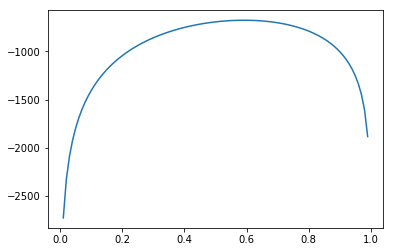

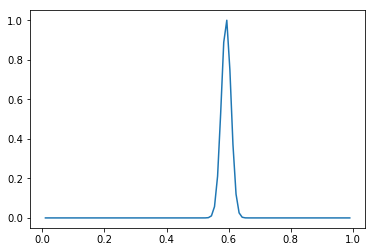

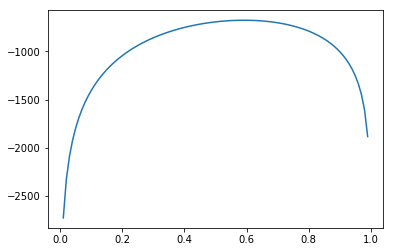

In [20]:
p=np.linspace(0.01,0.99,100)
lkls = log_likelihood(p,x)
plt.figure()
plt.plot(p,lkls)
plt.show()

We can also look at the normalized likelihood

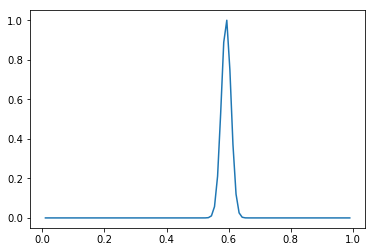

In [14]:
def likelihood(p, x):
    return (p**(sum(x)))*((1-p)**(len(x) - sum(x)))

plt.figure()
lkls = likelihood(p,x)
lkls = lkls / np.max(lkls)
plt.plot(p,lkls)
plt.show()

## 5. Conclusion

Maximum likelihood is probably one of the most important algorithm, without it there is no machine learning, neural newtorks etc...

We saw two ways to use it, theorically and numerically. The latter is mostly used because it is often to complicated to do the calculations.

# tl;dr
1. Start to hypothetize from what distribution your data comes from.
2. Calculate the log-likelihood (cost function).
3. Infer the derivative of the log-likelihood respect to parameters
4. Use gradient descent to update your parameters, with an initial guess

# Code

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

np.random.seed(0)
coin = np.random.binomial(1,0.6,5)

np.random.seed(3)
p = 0.6
n = 1000
x = np.random.binomial(1,p,n)

def bernoulli(p, x):
    return (p**x)*(1-p)**(1-x)

def log_likelihood(p, x):
    return np.sum(x)*np.log(p) + (len(x) - np.sum(x))*np.log(1-p)

def derivative_log_likelihood(p, x):
    sum_xi = np.sum(x)
    return (-1)*(sum_xi/p - (len(x) - sum_xi)/(1-p))
    
p = 0.1
learnRate = 1e-6
iterMax = 10000
iters = 0

for _ in range(iterMax):
    
    # gradient descent
    grad = derivative_log_likelihood(p, x)
    p = p - learnRate*grad
    iters = iters + 1
    if( abs(grad)<1e-6 ):
        break

print("Found probability %1.6f in %d with log-likelihood %1.3f" 
      %(p,iters,lkls[-1]))    

p=np.linspace(0.01,0.99,100)
lkls = log_likelihood(p,x)
plt.figure()
plt.plot(p,lkls)

def likelihood(p, x):
    return (p**(sum(x)))*((1-p)**(len(x) - sum(x)))

plt.figure()
lkls = likelihood(p,x)
lkls = lkls / np.max(lkls)
plt.plot(p,lkls)

Found probability 0.592000 in 5137 with log-likelihood 0.000
